In [2]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)

df = pd.read_csv('./top100_video_detail.csv')

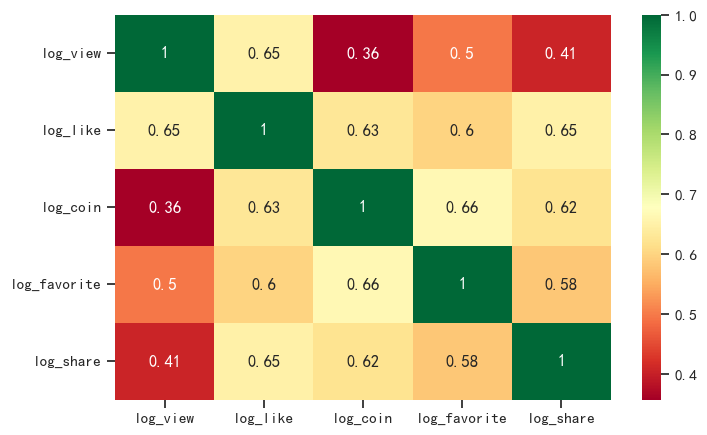

In [49]:
# corr_data = df[['view', 'like', 'coin', 'favorite', 'share']].corr()
# sns.heatmap(corr_data, cmap='RdYlGn', annot=True)
# plt.show()

df[f'log_view'] = df['view'].apply(np.log)
df[f'log_like'] = df['like'].apply(np.log)
df[f'log_coin'] = df['coin'].apply(np.log)
df[f'log_favorite'] = df['favorite'].apply(np.log)
df[f'log_share'] = df['share'].apply(np.log)

log_corr_data = df[['log_view', 'log_like', 'log_coin', 'log_favorite', 'log_share']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(log_corr_data, cmap='RdYlGn', annot=True)
plt.savefig('./img/log_corr')
plt.show()

In [64]:
sns.color_palette(n_colors=12)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)]

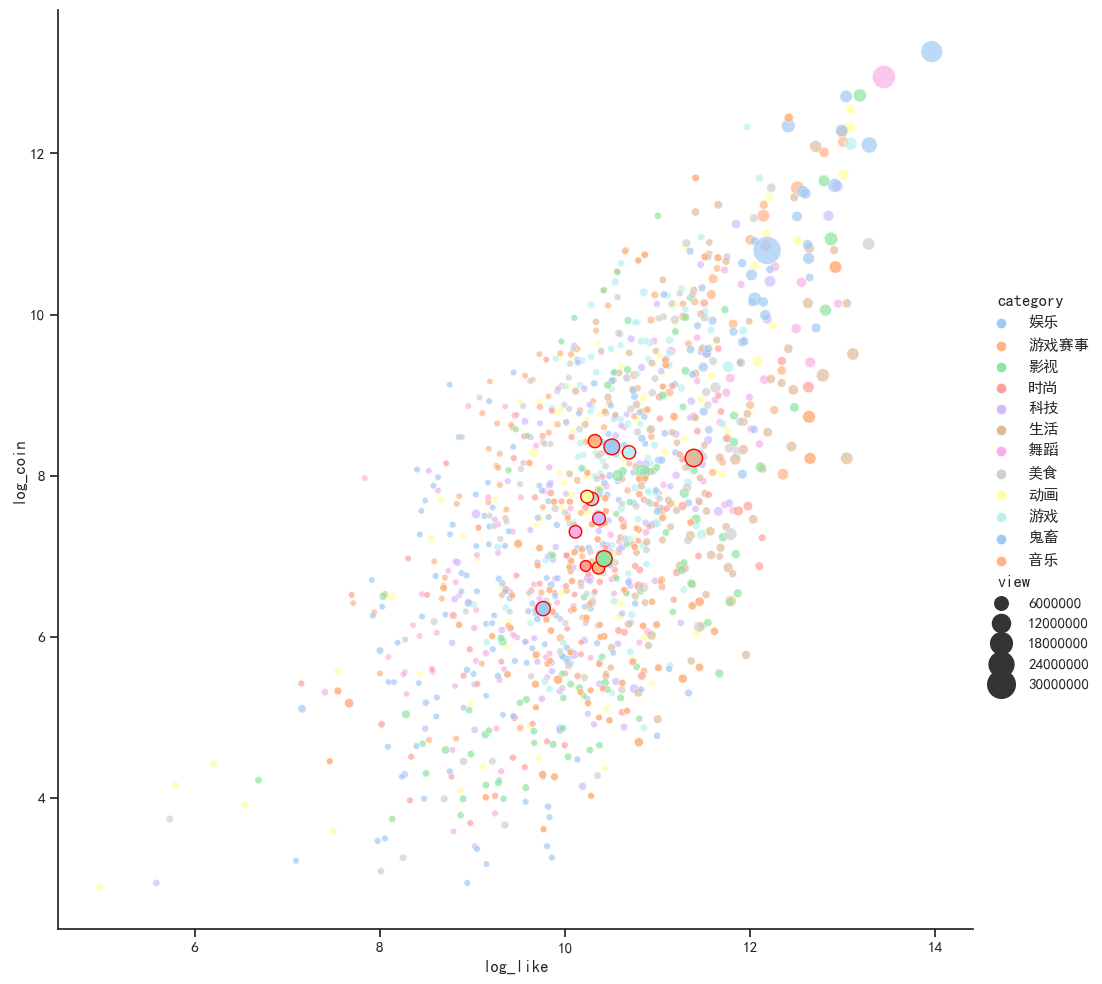

,log_like,log_coin,view,log_coin/log_like
category,,,,
娱乐,9.765554,6.349717,879312.160,0.650216
游戏赛事,10.363362,6.857617,672800.845,0.661717
影视,10.424022,6.970103,1102345.330,0.668658
时尚,10.225201,6.879371,503092.140,0.672786
科技,10.368422,7.468739,701901.990,0.720335
生活,11.392897,8.219917,1295176.000,0.721495
舞蹈,10.114490,7.303643,672668.100,0.722097
美食,10.290039,7.711802,798323.900,0.749443
动画,10.240177,7.740004,698766.980,0.755847


In [90]:
# plt.figure(figsize=(20, 20))
grouped = df[['category', 'log_like', 'log_coin', 'view']].groupby('category').mean()
grouped['log_coin/log_like'] = grouped['log_coin'] / grouped['log_like']
grouped = grouped.sort_values(by='log_coin/log_like')
sns.relplot(
      data=df,
      x="log_like", y="log_coin",
      hue="category", size="view",
      hue_order=grouped.index,
      height=10,
      alpha = 0.7,
      sizes=(20, 400),
      palette='pastel'
)
# sns.color_palette('muted', n_colors=12)

plt.scatter(grouped['log_like'], grouped['log_coin'], c=sns.color_palette('pastel', n_colors=12), edgecolors='red', linewidths=1, s=grouped['view']/10000 * 1.2)

plt.savefig('./img/log_like-log_coin_with_view_sized')
plt.show()

grouped

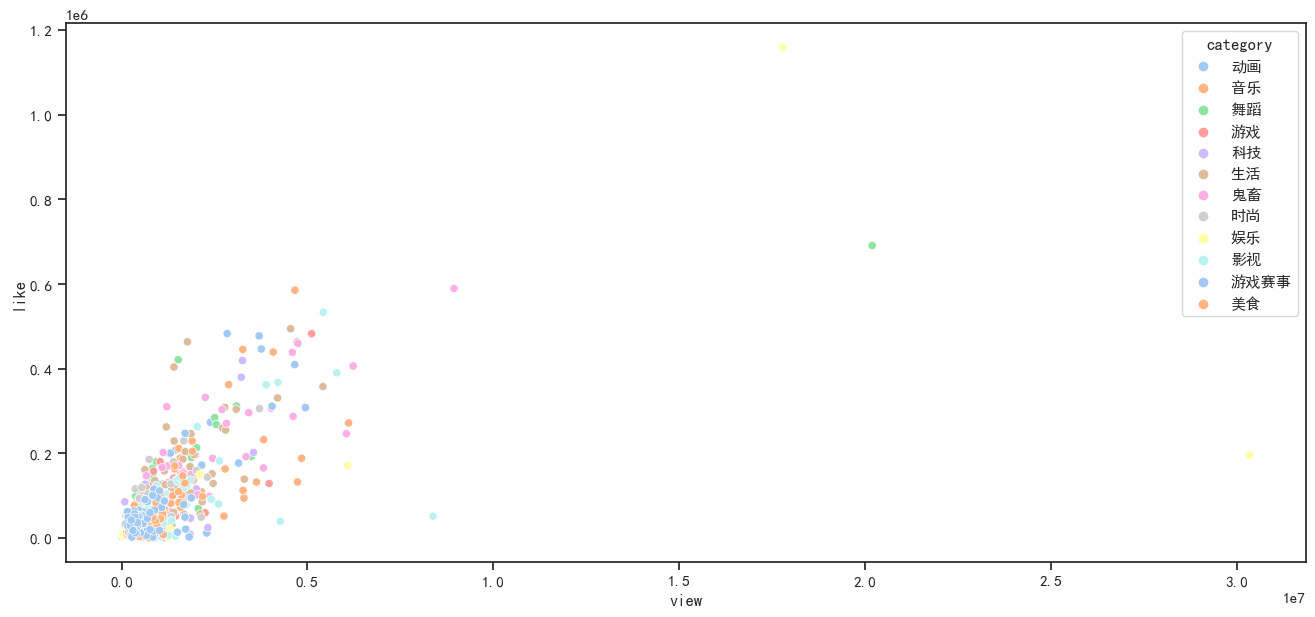

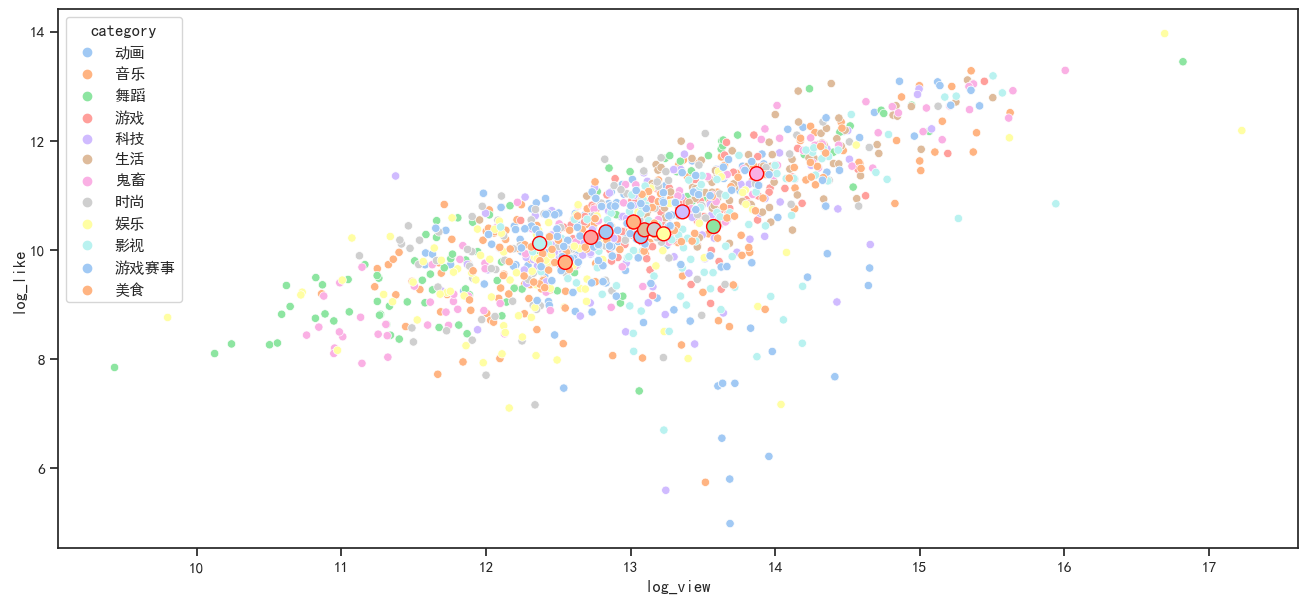

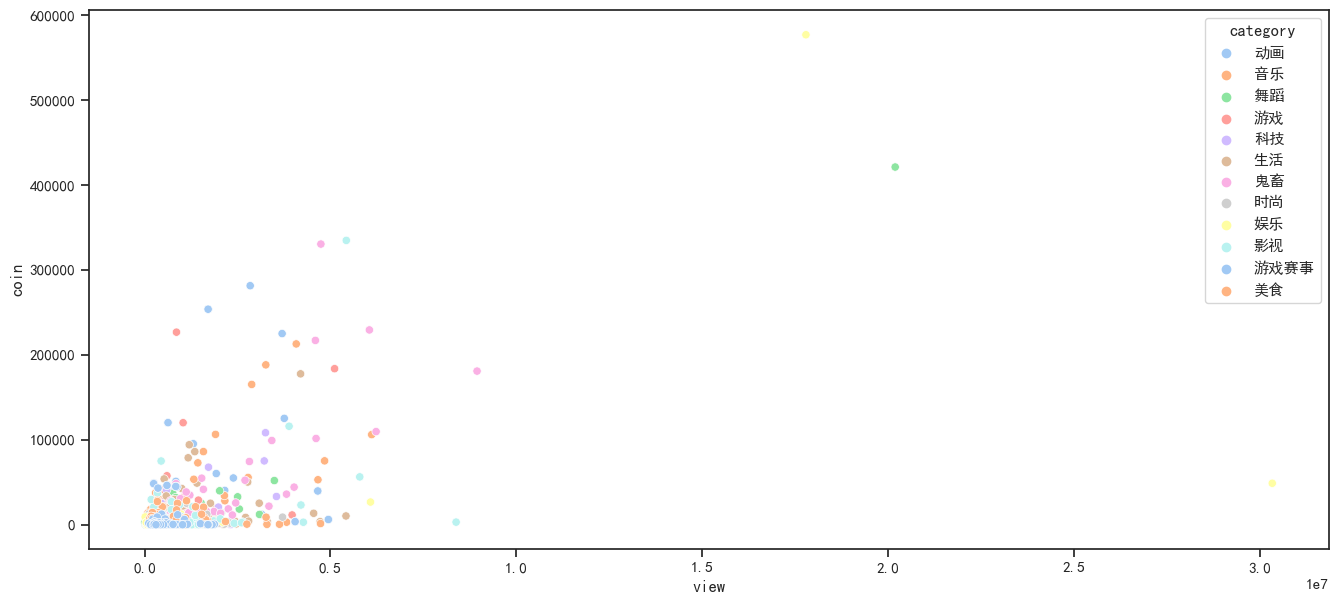

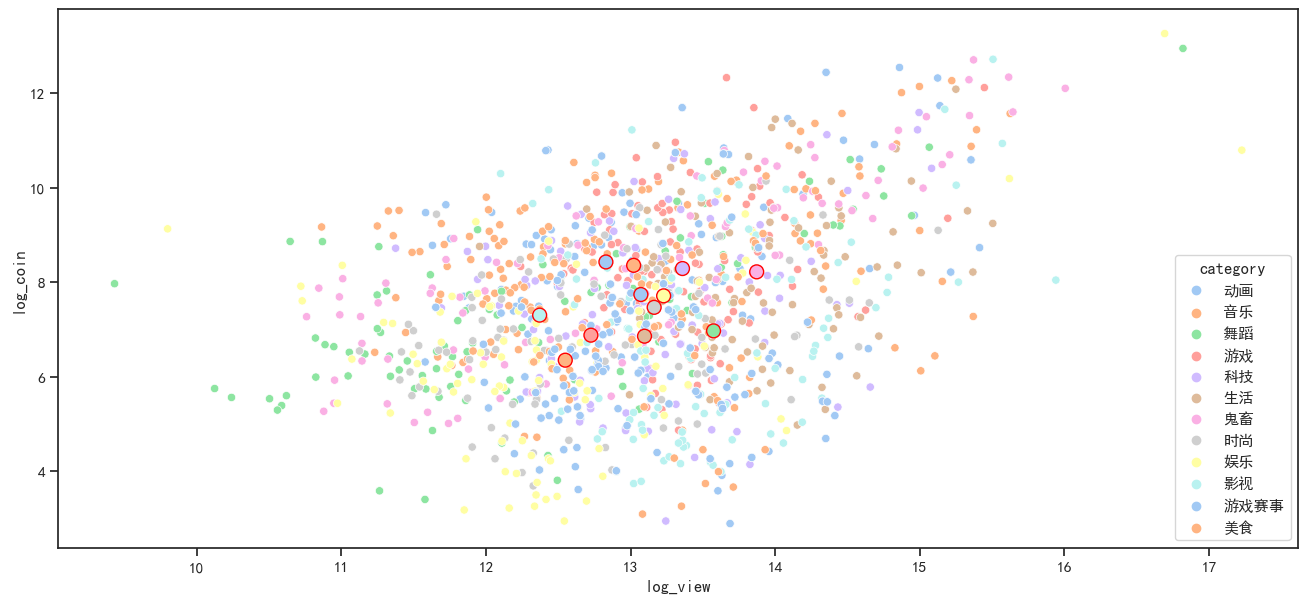

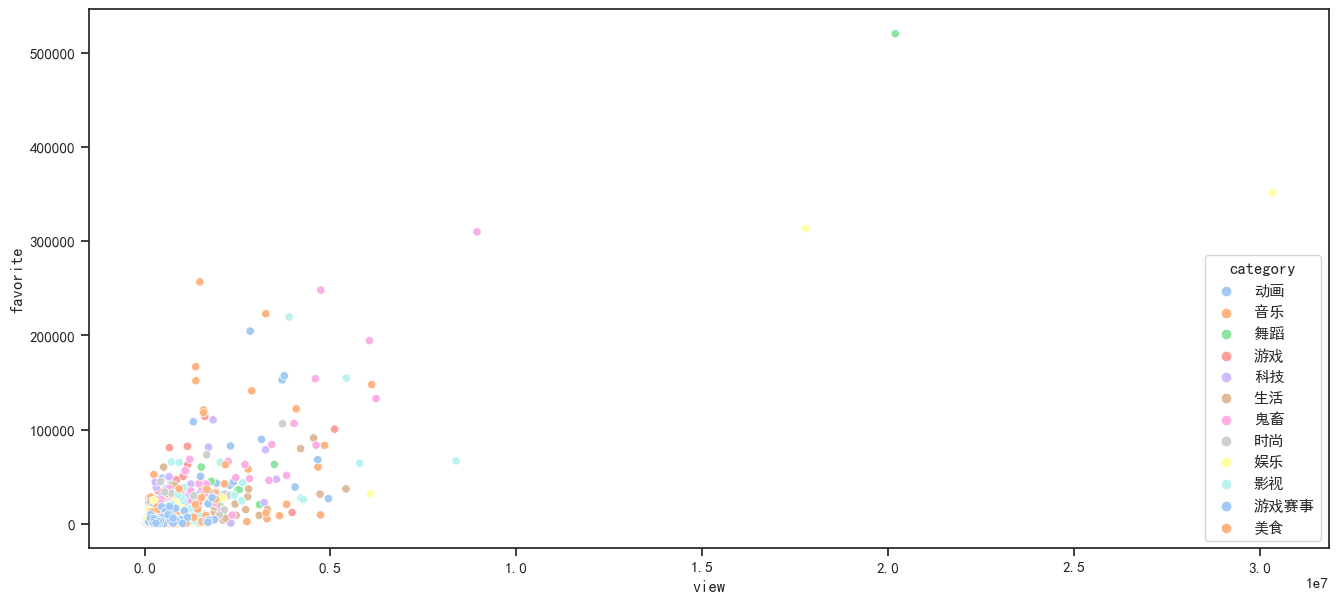

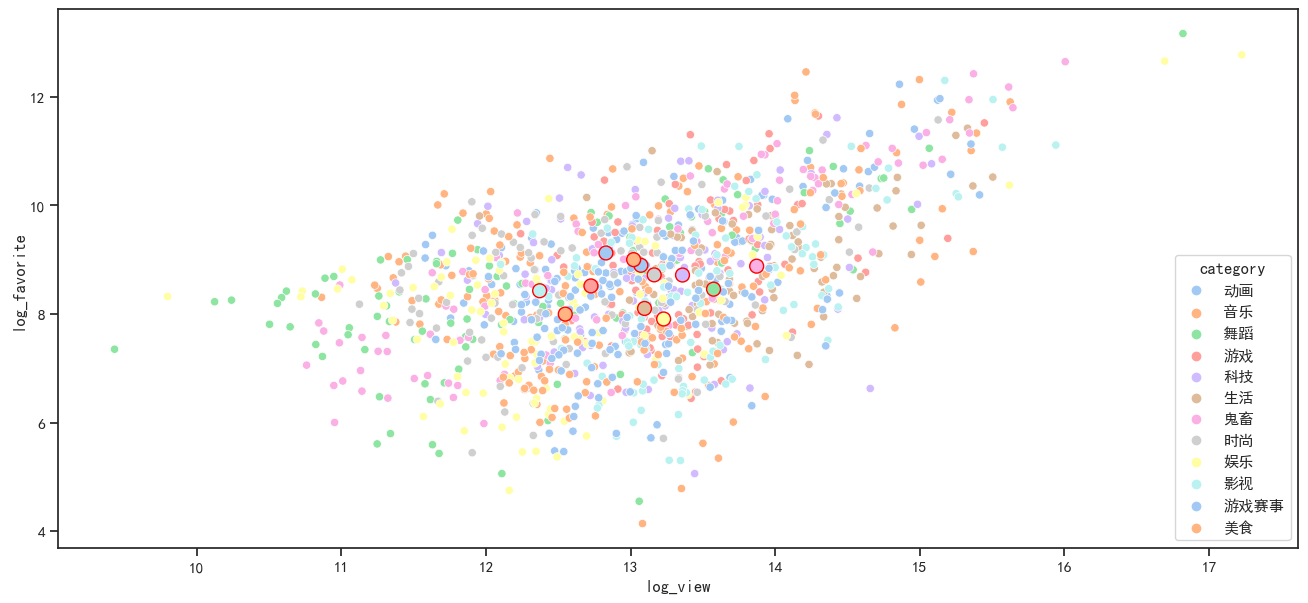

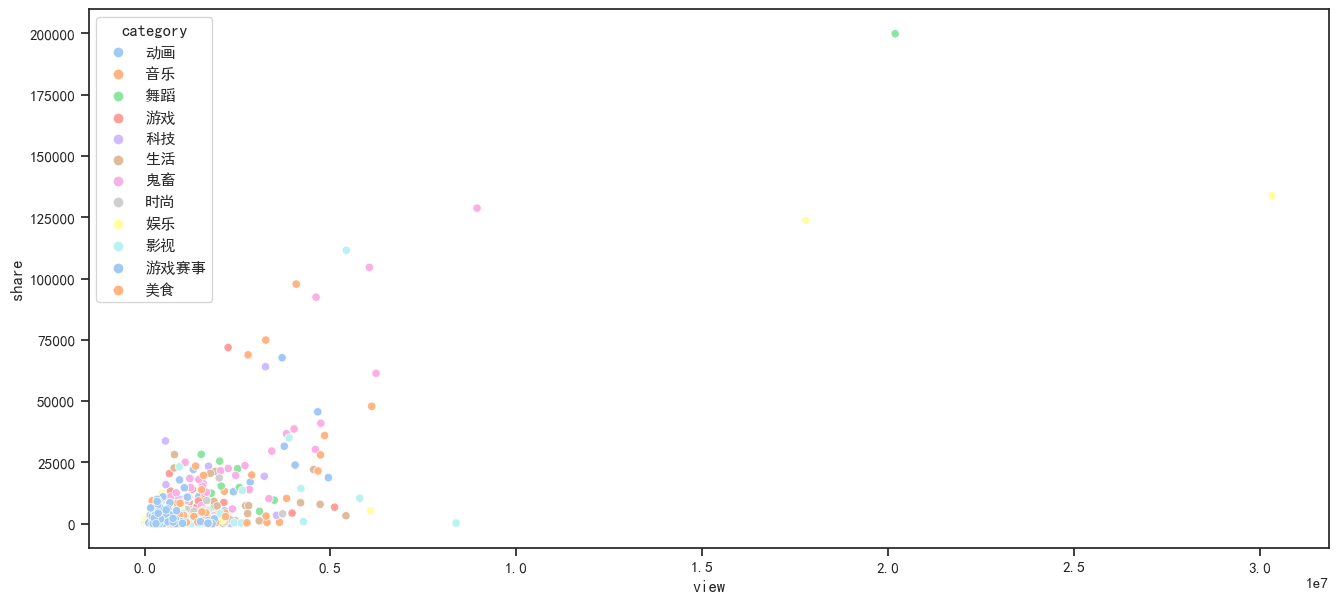

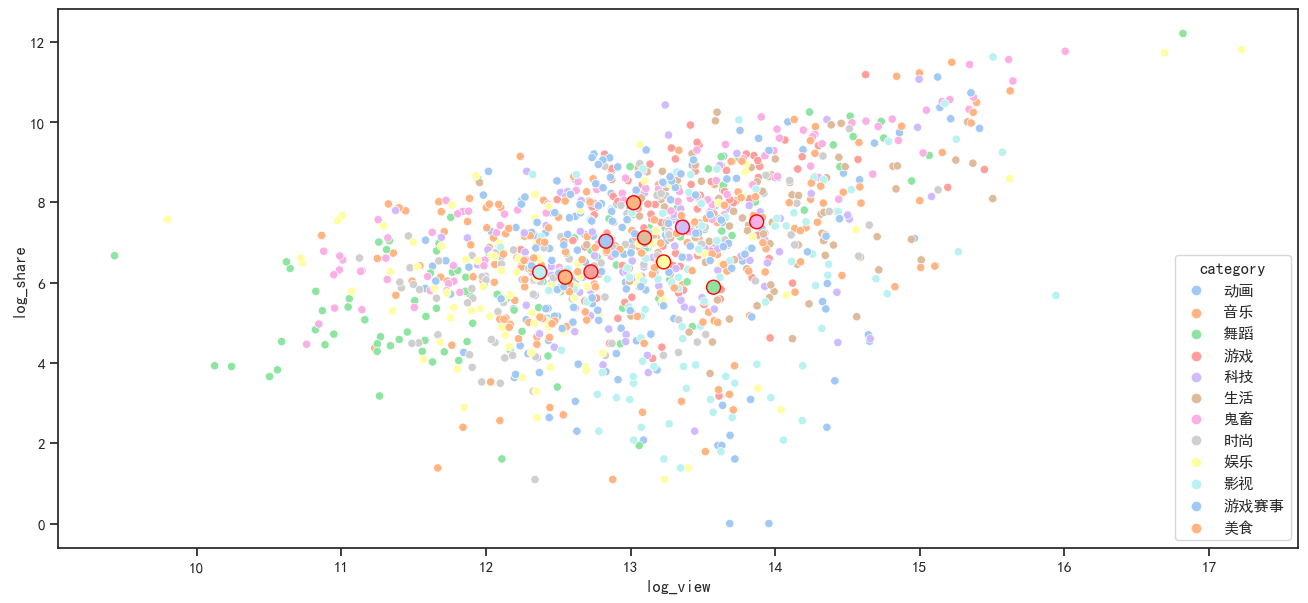

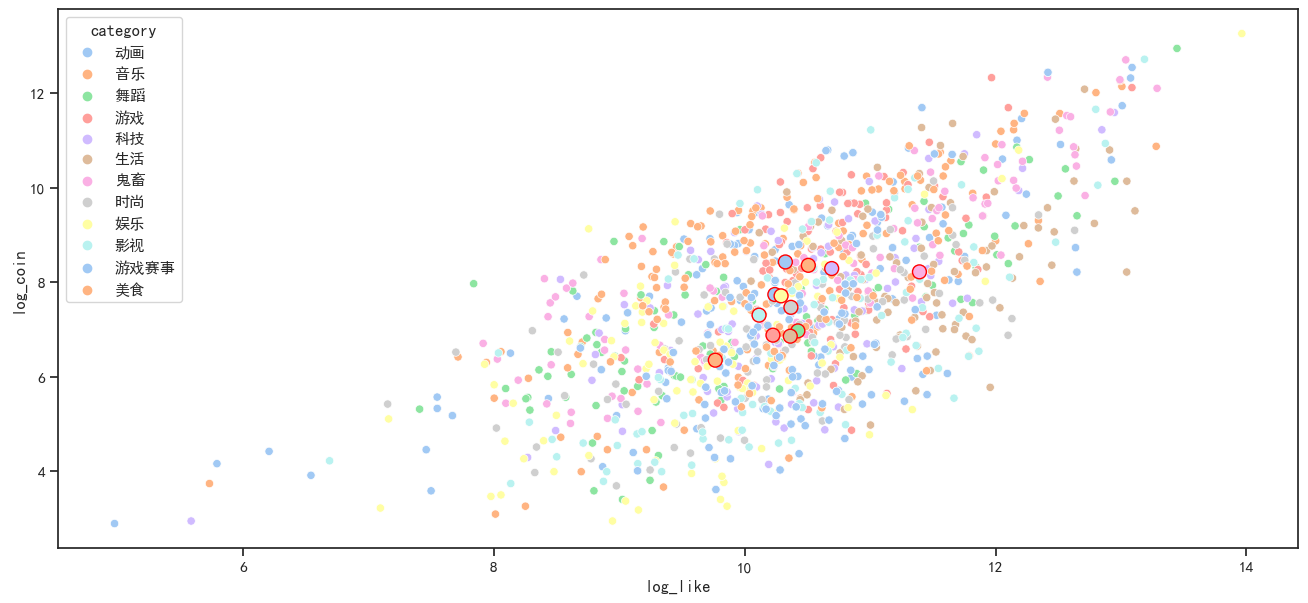

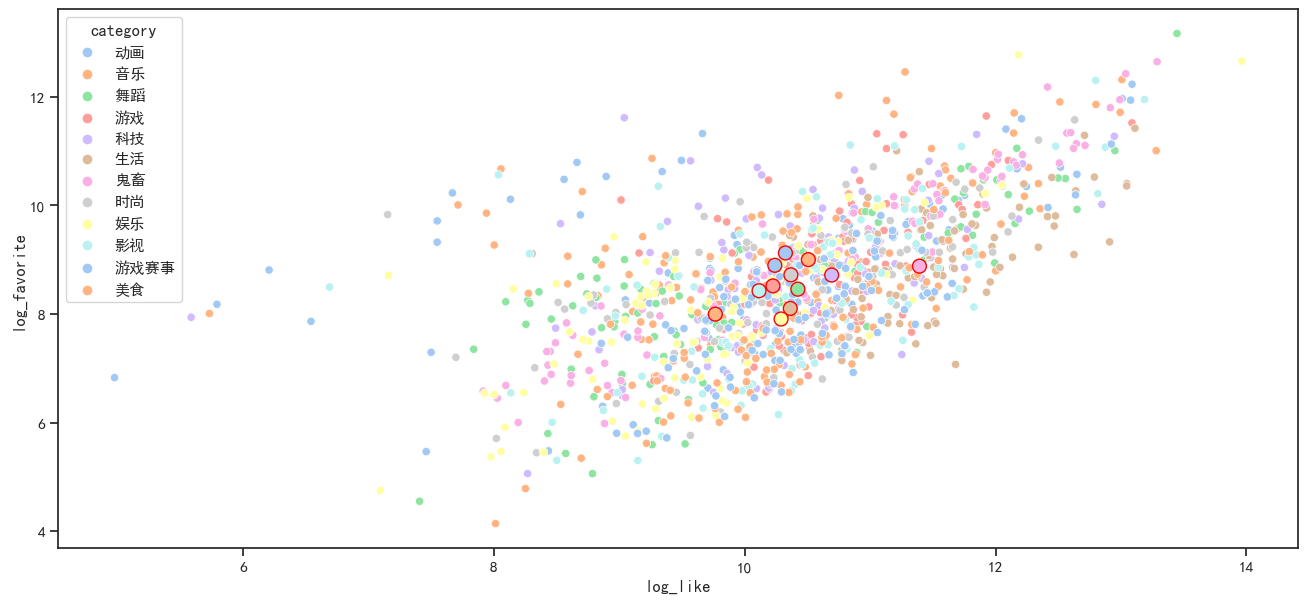

In [94]:

def draw_log_figure(x, y):
      _df = df.copy()
      _df[f'log_{x}'] = _df[x].apply(np.log)
      _df[f'log_{y}'] = _df[y].apply(np.log)

      plt.figure(figsize=(16, 7))
      sns.scatterplot(_df, x=f'log_{x}', y=f'log_{y}', hue='category', palette='pastel')

      grouped = _df[['category', f'log_{x}', f'log_{y}']].groupby('category').mean()

      plt.scatter(grouped[f'log_{x}'], grouped[f'log_{y}'], c=sns.color_palette('pastel', n_colors=12), edgecolors='red', linewidths=1, s=100)
      plt.savefig(f'./img/{x}-{y}-log')
      plt.show()


def draw_figure_and_log_figure(y):
      _df = df.copy()
      plt.figure(figsize=(16, 7))
      sns.scatterplot(df, x='view', y=y, hue='category', palette='pastel')
      plt.savefig(f'./img/view-{y}')
      plt.show()

      draw_log_figure('view', y)


draw_figure_and_log_figure('like')
draw_figure_and_log_figure('coin')
draw_figure_and_log_figure('favorite')
draw_figure_and_log_figure('share')

draw_log_figure('like', 'coin')
draw_log_figure('like', 'favorite')
# draw_log_figure('like')
# draw_log_figure('favorite')
# draw_log_figure('share')